# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/traffic-signs/train.p'
validation_file= '/traffic-signs/valid.p'
testing_file = '/traffic-signs/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train) | set(y_valid) | set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
from collections import Counter
import random
import matplotlib.image as mpimg

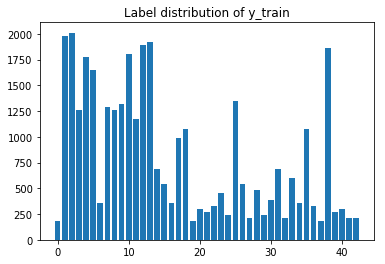

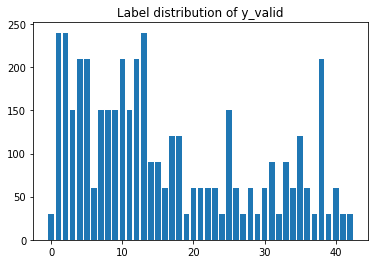

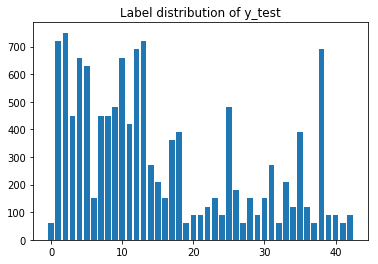

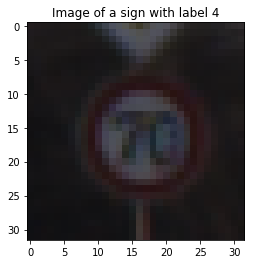

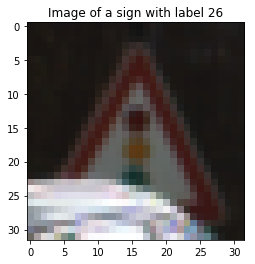

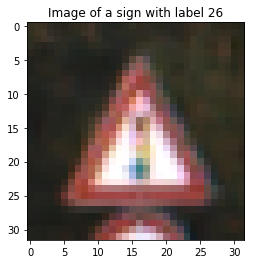

In [5]:
def label_dist(labels, s):


    c = Counter(labels)

    xhs = list(c.items())
    xs = list(map(lambda x: x[0], xhs))
    hs = list(map(lambda x: x[1], xhs))
    plt.figure()
    plt.title('Label distribution of %s' % s)
    plt.bar(xs, hs)
    plt.plot()
    
def plot_sign(data, labels):
    
    i = random.randrange(data.shape[0])
    
    plt.figure()
    plt.title('Image of a sign with label %s' % str(labels[i]))
    plt.imshow(data[i])
    plt.plot()
    
label_dist(y_train, 'y_train')
label_dist(y_valid, 'y_valid')
label_dist(y_test, 'y_test')
random.seed(42)
plot_sign(X_train, y_train)
plot_sign(X_valid, y_valid)
plot_sign(X_test, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
def preprocess(X):
    
    Xp = (X - 128.0) / 255
#     Xp = Xp.mean(axis=3)
#     Xp = Xp[:, :, :, np.newaxis]
    return Xp

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

### Model Architecture

In [7]:
import tensorflow as tf

from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


def LeNet(mu=0.0, sigma=0.1, beta=0.0):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    keep_prob = tf.placeholder(tf.float32)
    one_hot_y = tf.one_hot(y, 43)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 8), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 250), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(250))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

#     fc1 = tf.layers.dropout(fc1, rate=, training=is_training)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(250, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=RATE)
    regularization = tf.nn.l2_loss(conv1_W) + \
                     tf.nn.l2_loss(conv2_W) + \
                     tf.nn.l2_loss(fc1_W) + \
                     tf.nn.l2_loss(fc2_W) + \
                     tf.nn.l2_loss(fc3_W)
    training_operation = optimizer.minimize(loss_operation+beta*regularization)

    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return x, y, logits, keep_prob, training_operation, accuracy_operation

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

RATE = 0.001
EPOCHS = 60
BATCH_SIZE = 1024
KEEP_PROB = 0.5

x, y, logits, keep_prob, training_operation, accuracy_operation = LeNet(beta=0.0)
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            X_batch, y_batch = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: X_batch, y: y_batch, keep_prob: KEEP_PROB})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f} Validation Accuracy = {:.3f}".format(train_accuracy, 
                                                                            validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.291 Validation Accuracy = 0.233

EPOCH 2 ...
Train Accuracy = 0.470 Validation Accuracy = 0.403

EPOCH 3 ...
Train Accuracy = 0.580 Validation Accuracy = 0.511

EPOCH 4 ...
Train Accuracy = 0.713 Validation Accuracy = 0.637

EPOCH 5 ...
Train Accuracy = 0.809 Validation Accuracy = 0.736

EPOCH 6 ...
Train Accuracy = 0.867 Validation Accuracy = 0.798

EPOCH 7 ...
Train Accuracy = 0.898 Validation Accuracy = 0.825

EPOCH 8 ...
Train Accuracy = 0.920 Validation Accuracy = 0.842

EPOCH 9 ...
Train Accuracy = 0.938 Validation Accuracy = 0.866

EPOCH 10 ...
Train Accuracy = 0.948 Validation Accuracy = 0.877

EPOCH 11 ...
Train Accuracy = 0.957 Validation Accuracy = 0.896

EPOCH 12 ...
Train Accuracy = 0.964 Validation Accuracy = 0.905

EPOCH 13 ...
Train Accuracy = 0.968 Validation Accuracy = 0.904

EPOCH 14 ...
Train Accuracy = 0.971 Validation Accuracy = 0.915

EPOCH 15 ...
Train Accuracy = 0.972 Validation Accuracy = 0.912

EPOCH 16 ...
Train Ac

In [12]:
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./lenet")
    
    validation_accuracy = evaluate(X_valid, y_valid)
    test_accuracy = evaluate(X_test, y_test)
    print("Validation Accuracy = {:.3f} Test Accuracy = {:.3f}".format(validation_accuracy, 
                                                                            test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Validation Accuracy = 0.954 Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [13]:
import cv2
import numpy as np

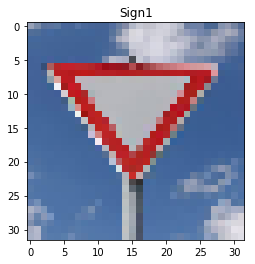

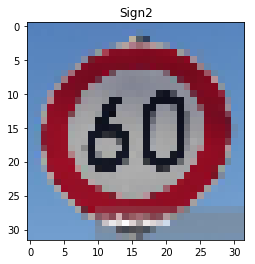

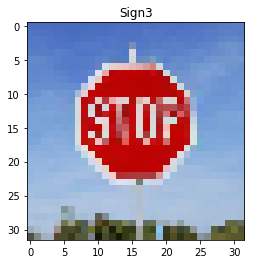

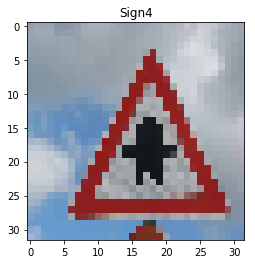

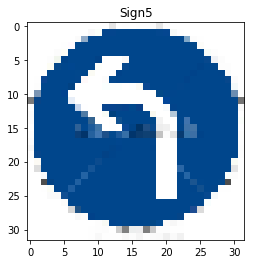

In [14]:

new_signs = []
for i in range(1, 6):
    new_sign = mpimg.imread('/traffic-signs/sign%d.jpg' % i)
    new_sign = cv2.resize(new_sign, dsize=(32, 32))
    new_signs.append(new_sign)
    plt.figure()
    plt.title('Sign%d' % i)
    plt.imshow(new_sign)
    
new_signs = np.array(new_signs)

In [15]:
new_signs.shape

(5, 32, 32, 3)

### Predict the Sign Type for Each Image

In [16]:
new_signs = preprocess(new_signs)

In [17]:
new_signs = new_signs.astype(np.float)

In [18]:
new_signs.dtype

dtype('float64')

In [19]:
new_signs[0]

array([[[ 0.09019608,  0.12941176,  0.21568627],
        [-0.02745098,  0.04313725,  0.15686275],
        [-0.15294118, -0.05882353,  0.10196078],
        ..., 
        [ 0.07058824,  0.09803922,  0.19607843],
        [-0.04313725,  0.01568627,  0.12941176],
        [-0.16078431, -0.0745098 ,  0.08235294]],

       [[-0.18431373, -0.07058824,  0.09411765],
        [-0.19607843, -0.0745098 ,  0.09019608],
        [-0.22352941, -0.09803922,  0.10196078],
        ..., 
        [ 0.16470588,  0.17647059,  0.23137255],
        [ 0.10980392,  0.12941176,  0.21176471],
        [-0.0745098 , -0.00392157,  0.1372549 ]],

       [[-0.23529412, -0.09411765,  0.10980392],
        [-0.23529412, -0.09411765,  0.10980392],
        [-0.23137255, -0.10196078,  0.09803922],
        ..., 
        [-0.00392157,  0.03921569,  0.14117647],
        [-0.04313725,  0.02352941,  0.15294118],
        [-0.10588235, -0.01176471,  0.1372549 ]],

       ..., 
       [[-0.00784314,  0.05882353,  0.17647059],
        

In [24]:
top_k = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./lenet")
    
#     validation_accuracy = evaluate(X_valid, y_valid)
#     test_accuracy = evaluate(X_test, y_test)
    scores, indices = sess.run(top_k, feed_dict={x: new_signs, keep_prob: 1.0})
    
    for i in range(len(scores)):
        
        print('Sign %d top predictions: %s' % (i+1, ' '.join(map(lambda x: '%d[%.3f]' % (x[0], x[1]), zip(indices[i], scores[i])))))

INFO:tensorflow:Restoring parameters from ./lenet
Sign 1 top predictions: 13[66.806] 9[30.367] 10[15.035] 35[14.906] 3[13.425]
Sign 2 top predictions: 3[47.849] 2[27.934] 5[19.298] 1[6.834] 32[6.051]
Sign 3 top predictions: 12[32.306] 17[30.241] 14[21.334] 10[19.711] 13[17.076]
Sign 4 top predictions: 11[40.816] 30[22.592] 27[11.722] 21[8.970] 16[5.835]
Sign 5 top predictions: 34[10.441] 20[9.254] 40[9.218] 38[5.079] 33[2.964]
